In [ ]:
!pip install imbalanced-learn
!pip install tensorflow
!pip install scikit-learn
!pip show tensorflow
!pip install lime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import xgboost as Xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.metrics import f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.base import BaseEstimator, ClassifierMixin
from lime.lime_tabular import LimeTabularExplainer
import lime
import lime.lime_tabular

import shap
from sklearn.preprocessing import LabelEncoder

Name: tensorflow
Version: 2.18.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tensorflow-text, tf_keras
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=71668118f8d86396c9d4e41246d15c27899a6c5d31af2789efda30e029457ea8
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
# Dataset_1=pd.read_csv('/content/Final_dataset_1.csv')
# Dataset_2=pd.read_csv('/content/Final dataset_2.csv')
# Dataset_3=pd.read_csv('/content/final_dataset_3.csv')

In [ ]:
# import pandas as pd

# # Load datasets
# df1 = pd.read_csv('/content/Final_dataset_1.csv')
# df2 = pd.read_csv('/content/Final dataset_2.csv')
# df3 = pd.read_csv('/content/final_dataset_3.csv')

# # 1. Column Consolidation: Ensure all datasets have the same columns
# common_columns = list(set(df1.columns) & set(df2.columns) & set(df3.columns))

# df1 = df1[common_columns]
# df2 = df2[common_columns]
# df3 = df3[common_columns]

# # 2. Row-Wise Merging: Concatenate datasets
# merged_df = pd.concat([df1, df2, df3], ignore_index=True)

# # Save merged dataset
# merged_df.to_csv('common_dataset.csv', index=False)

# print(f"Final merged dataset shape: {merged_df.shape}")


In [ ]:
dataset=pd.read_csv('/content/common_dataset.csv')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9316 entries, 0 to 9315
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Hair Loss                 9316 non-null   int64
 1   Hair_washing              9316 non-null   int64
 2   Nutritional Deficiencies  9316 non-null   int64
 3   Smoking                   9316 non-null   int64
 4   Job_role                  9316 non-null   int64
 5   Genetics                  9316 non-null   int64
 6   Stress                    9316 non-null   int64
 7   Libido                    9316 non-null   int64
 8   Salary                    9316 non-null   int64
 9   Medications & Treatments  9316 non-null   int64
 10  Stay_up_late              9316 non-null   int64
 11  Weight Loss               9316 non-null   int64
 12  Hair_grease               9316 non-null   int64
 13  Province                  9316 non-null   int64
dtypes: int64(14)
memory usage: 1019.1 KB


                           Genetics    Libido    Salary  \
Genetics                   1.000000  0.032686  0.214509   
Libido                     0.032686  1.000000  0.100482   
Salary                     0.214509  0.100482  1.000000   
Medications & Treatments   0.121124 -0.012665 -0.180877   
Nutritional Deficiencies  -0.108858 -0.053001  0.207838   
Stress                    -0.009997 -0.142897 -0.116358   
Job_role                   0.008618  0.182740  0.014822   
Stay_up_late              -0.081815  0.014313 -0.104739   
Hair_grease                0.084865  0.095743  0.052916   
Smoking                    0.001597 -0.071581 -0.118676   
Weight Loss               -0.129235 -0.157358 -0.115973   
Province                   0.010246  0.127945 -0.053936   
Hair_washing              -0.174030  0.040513 -0.093657   
Hair Loss                 -0.095462  0.030852 -0.012721   

                           Medications & Treatments  \
Genetics                                   0.121124   
Libi

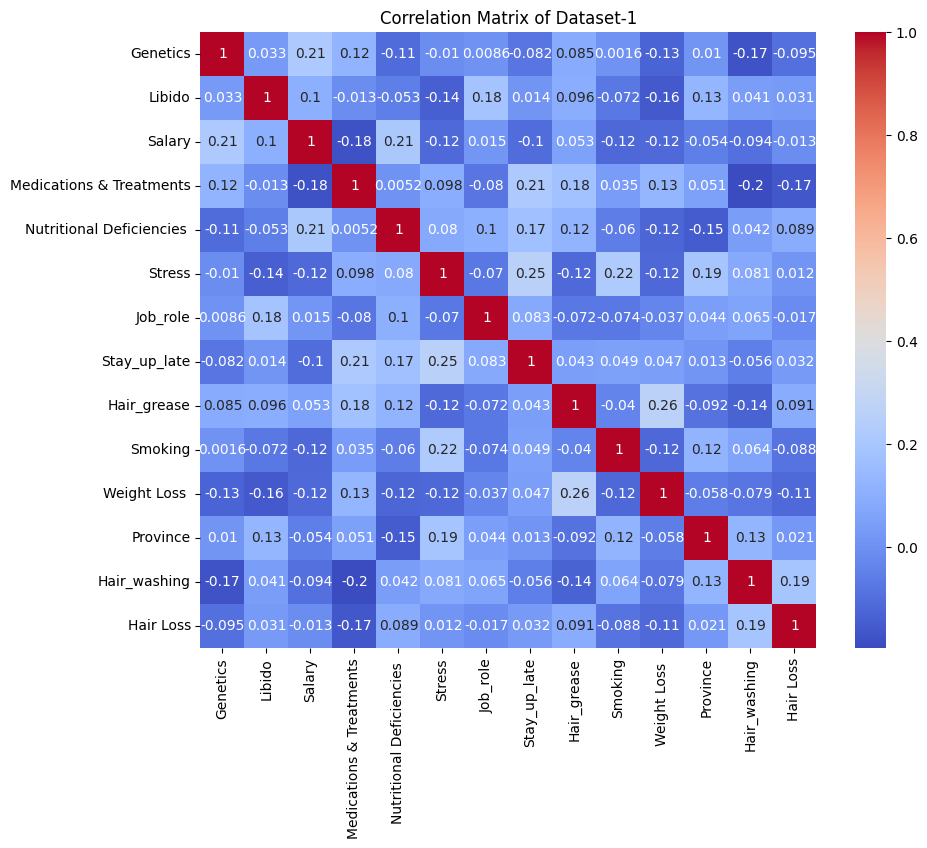

In [ ]:
np.random.seed(0)
data = np.random.rand(100, 14)
df = pd.DataFrame(data, columns=['Genetics', 'Libido', 'Salary', 'Medications & Treatments', 'Nutritional Deficiencies ','Stress','Job_role','Stay_up_late','Hair_grease','Smoking','Weight Loss ','Province','Hair_washing','Hair Loss'])

# Calculate the correlation matrix
corr_matrix = df.corr()

# Print the correlation matrix
print(corr_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Dataset-1')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
# X= dataset[["Genetics","Medications & Treatments","Weight Loss","Hair_grease","Nutritional Deficiencies","Smoking","Hair_washing"]]
X= dataset[["Genetics","Medications & Treatments","Weight Loss","Hair_grease","Nutritional Deficiencies"]]
Y= dataset["Hair Loss"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
print("Before Augmentation (Training):")
print(Y_train.value_counts(normalize=True) * 100)

# print("\nAfter Augmentation (Training):")
# print(Y_train_balanced.value_counts(normalize=True) * 100)

print("\nActual Test:")
print(Y_test.value_counts(normalize=True) * 100)

Before Augmentation (Training):
Hair Loss
0    53.350713
1    46.649287
Name: proportion, dtype: float64

Actual Test:
Hair Loss
0    54.776386
1    45.223614
Name: proportion, dtype: float64


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit & transform training data
X_test_scaled = scaler.transform(X_test)

In [ ]:
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train_scaled, Y_train)  # Train the model

# Predictions on training data
X_train_prediction_log_reg = log_reg.predict(X_train_scaled)
train_accuracy_log_reg = accuracy_score(Y_train, X_train_prediction_log_reg)
print("Training data accuracy of Logistic Regression: ", train_accuracy_log_reg)

# Predictions on test data
X_test_prediction_log_reg = log_reg.predict(X_test_scaled)
test_accuracy_log_reg = accuracy_score(Y_test, X_test_prediction_log_reg)
print("Testing data accuracy of Logistic Regression: ", test_accuracy_log_reg)

Training data accuracy of Logistic Regression:  0.8606042018095384
Testing data accuracy of Logistic Regression:  0.8572450805008944


In [ ]:
nbayes = GaussianNB()
nbayes.fit(X_train_scaled, Y_train)

X_train_prediction_nbayes=nbayes.predict(X_train_scaled)
train_accuracy_nbayes=accuracy_score(Y_train,X_train_prediction_nbayes)
print("Training data accuracy of nbayes: ",train_accuracy_nbayes)

X_test_prediction_nbayes=nbayes.predict(X_test_scaled)
test_accuracy_nbayes=accuracy_score(Y_test,X_test_prediction_nbayes)
print("Testing data accuracy of nbayes: ",test_accuracy_nbayes)

Training data accuracy of nbayes:  0.7437509584419567
Testing data accuracy of nbayes:  0.7445438282647585


In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_scaled, Y_train)

X_train_prediction_knn=knn.predict(X_train_scaled)
train_accuracy_knn=accuracy_score(Y_train,X_train_prediction_knn)
print("Training data accuracy of knn: ",train_accuracy_knn)

X_test_prediction_knn=knn.predict(X_test_scaled)
test_accuracy_knn=accuracy_score(Y_test,X_test_prediction_knn)
print("Testing data accuracy of knn: ",test_accuracy_knn)

Training data accuracy of knn:  0.8909676429995399
Testing data accuracy of knn:  0.8862254025044722


In [ ]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_scaled, Y_train)

X_train_prediction_dt_classifier=dt_classifier.predict(X_train_scaled)
train_accuracy_dt_classifier=accuracy_score(Y_train,X_train_prediction_dt_classifier)
print("Training data accuracy of dt_classifier: ",train_accuracy_dt_classifier)

X_test_prediction_dt_classifier=dt_classifier.predict(X_test_scaled)
test_accuracy_dt_classifier=accuracy_score(Y_test,X_test_prediction_dt_classifier)
print("Testing data accuracy of dt_classifier: ",test_accuracy_dt_classifier)

Training data accuracy of dt_classifier:  0.8918877472780249
Testing data accuracy of dt_classifier:  0.8826475849731664


In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train_scaled, Y_train)
X_train_prediction_random_forest=random_forest.predict(X_train_scaled)
train_accuracy_random_forest=accuracy_score(Y_train,X_train_prediction_random_forest)
print("Training data accuracy of random_forest: ",train_accuracy_random_forest)
X_test_prediction_random_forest=random_forest.predict(X_test_scaled)
test_accuracy_random_forest=accuracy_score(Y_test,X_test_prediction_random_forest)
print("Testing data accuracy of random_forest: ",test_accuracy_random_forest)

Training data accuracy of random_forest:  0.8918877472780249
Testing data accuracy of random_forest:  0.8808586762075135


In [ ]:
xgb = Xgb.XGBClassifier()
xgb.fit(X_train_scaled, Y_train)
X_train_prediction_xgb=xgb.predict(X_train_scaled)
train_accuracy_xgb=accuracy_score(Y_train,X_train_prediction_xgb)
print("Training data accuracy of xgb: ",train_accuracy_xgb)
X_test_prediction_xgb=xgb.predict(X_test_scaled)
test_accuracy_xgb=accuracy_score(Y_test,X_test_prediction_xgb)
print("Testing data accuracy of xgb: ",test_accuracy_xgb)

Training data accuracy of xgb:  0.8918877472780249
Testing data accuracy of xgb:  0.8826475849731664


In [ ]:
svc = SVC()
svc.fit(X_train_scaled, Y_train)
X_train_prediction_svc=svc.predict(X_train_scaled)
train_accuracy_svc=accuracy_score(Y_train,X_train_prediction_svc)
print("Training data accuracy of xgb: ",train_accuracy_svc)

X_test_prediction_svc=svc.predict(X_test_scaled)
test_accuracy_svc=accuracy_score(Y_test,X_test_prediction_svc)
print("Testing data accuracy of svc: ",test_accuracy_svc)

Training data accuracy of xgb:  0.8918877472780249
Testing data accuracy of svc:  0.8808586762075135


In [ ]:
#predictions_xgb = xgb.predict(X_test_scaled)
predictions_svc =svc.predict(X_test_scaled)
predictions_log_reg = log_reg.predict(X_test_scaled)
predictions_rf = random_forest.predict(X_test_scaled)
predictions_knn = knn.predict(X_test_scaled)
predictions_nb = nbayes.predict(X_test_scaled)
predictions_dt = dt_classifier.predict(X_test_scaled)
predictions_xgb = xgb.predict(X_test_scaled)

# Combine predictions into a new DataFrame
predictions_df = pd.DataFrame({
    'xgb': predictions_xgb,
    'svc': predictions_svc,
    'log_reg': predictions_log_reg,
    'rf': predictions_rf,
    'knn': predictions_knn,
    'nb': predictions_nb,
    'dt': predictions_dt
})

# Step 2: Prepare the target variable
target = Y_test  # Use the actual target variable for the test set

# Step 3: Train a meta-classifier
meta_classifier =  Xgb.XGBClassifier()   # You can choose any classifier as the meta-classifier

# meta_classifier =  svc  # You can choose any classifier as the meta-classifier
meta_classifier.fit(predictions_df, target)

# Step 4: Make predictions with the meta-classifier
y_pred_meta = meta_classifier.predict(predictions_df)

# Step 5: Evaluate the performance of the meta-classifier
accuracy_meta = accuracy_score(target, y_pred_meta)
print("Accuracy of Meta Classifier:", accuracy_meta)

Accuracy of Meta Classifier: 0.8865831842576029


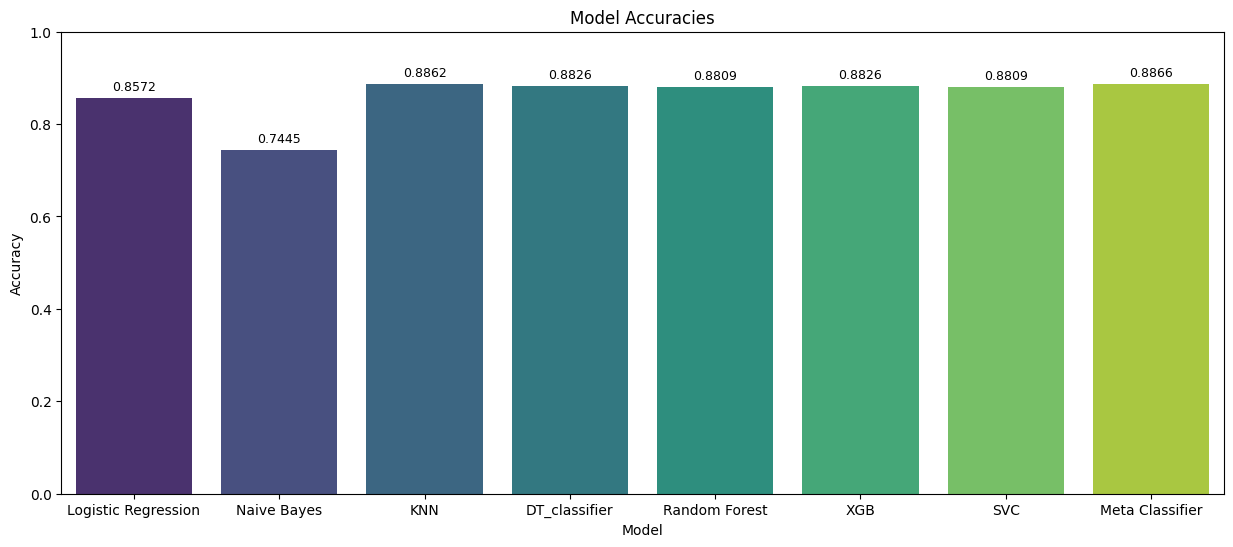

In [ ]:
models = ["Logistic Regression", "Naive Bayes","KNN","DT_classifier","Random Forest","XGB","SVC","Meta Classifier"]
accuracies = [test_accuracy_log_reg, test_accuracy_nbayes,test_accuracy_knn,test_accuracy_dt_classifier,test_accuracy_random_forest,test_accuracy_xgb,test_accuracy_svc,accuracy_meta]

# Create a bar plot using Seaborn
plt.figure(figsize=(15, 6))
sns.barplot(x=models, y=accuracies, hue=models, palette="viridis", legend=False)
plt.title("Model Accuracies")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy

# Display numeric values on the bars
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.01, f"{accuracy:.4f}", ha="center", va="bottom", fontsize=9)

plt.show()

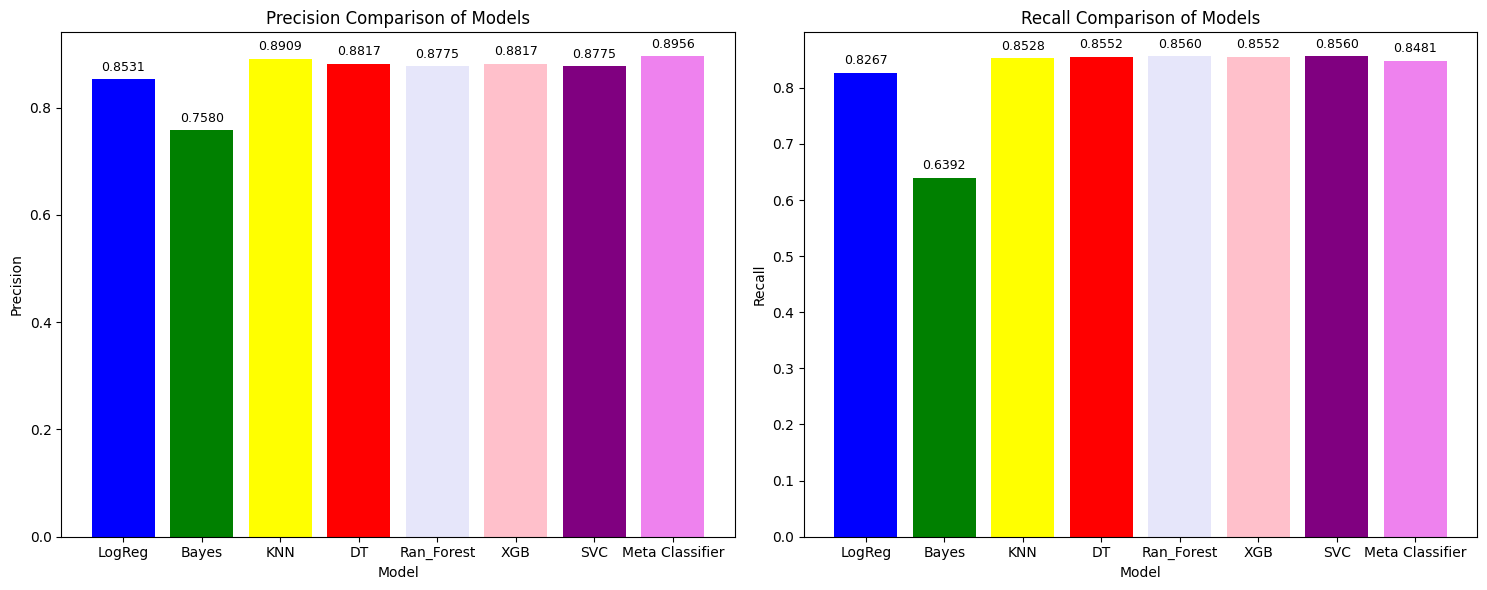

In [ ]:
# Calculate precision and recall for each model
precisions = [precision_score(Y_test,X_test_prediction_log_reg), precision_score(Y_test, X_test_prediction_nbayes),  precision_score(Y_test, X_test_prediction_knn),precision_score(Y_test, X_test_prediction_dt_classifier),precision_score(Y_test,X_test_prediction_random_forest),precision_score(Y_test,X_test_prediction_xgb),precision_score(Y_test,X_test_prediction_svc),precision_score(target, y_pred_meta)]
recalls = [recall_score(Y_test, X_test_prediction_log_reg), recall_score(Y_test, X_test_prediction_nbayes),  recall_score(Y_test, X_test_prediction_knn),recall_score(Y_test, X_test_prediction_dt_classifier),recall_score(Y_test,X_test_prediction_random_forest),recall_score(Y_test,X_test_prediction_xgb),recall_score(Y_test,X_test_prediction_svc),recall_score(target, y_pred_meta)]

# Define models
models = ["LogReg", "Bayes", "KNN","DT","Ran_Forest","XGB","SVC","Meta Classifier"]

# Plot the bar chart for precision
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.bar(models, precisions, color=["blue", "green", "yellow","red","lavender","pink","purple","violet"])
plt.xlabel('Model')
plt.ylabel('Precision')
plt.title('Precision Comparison of Models')
for i, f1 in enumerate(precisions):
    plt.text(i, f1 + 0.01, f"{f1:.4f}", ha="center", va="bottom", fontsize=9)


# Plot the bar chart for recall
plt.subplot(1, 2, 2)
plt.bar(models, recalls, color=["blue", "green", "yellow","red","lavender","pink","purple","violet"])
plt.xlabel('Model')
plt.ylabel('Recall')
plt.title('Recall Comparison of Models')
for i, f1 in enumerate(recalls):
    plt.text(i, f1 + 0.01, f"{f1:.4f}", ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()




In [ ]:
from sklearn.metrics import f1_score

# List of model names
models = ['Logistic Regression', 'Naive Bayes', 'K-Nearest Neighbors',
          'Decision Tree', 'Random Forest', 'XGBoost', 'SVC', 'Meta Classifier']

# Calculate F1-score for each model
f1_scores = [
    f1_score(Y_test, X_test_prediction_log_reg),
    f1_score(Y_test, X_test_prediction_nbayes),
    f1_score(Y_test, X_test_prediction_knn),
    f1_score(Y_test, X_test_prediction_dt_classifier),
    f1_score(Y_test, X_test_prediction_random_forest),
    f1_score(Y_test, X_test_prediction_xgb),
    f1_score(Y_test, X_test_prediction_svc),
    f1_score(Y_test, y_pred_meta)  # Use Y_test for consistency
]

# Print F1-scores for each model
for model, f1_score_value in zip(models, f1_scores):
    print(f"{model}: F1-score = {f1_score_value:.4f}")


Logistic Regression: F1-score = 0.8397
Naive Bayes: F1-score = 0.6936
K-Nearest Neighbors: F1-score = 0.8715
Decision Tree: F1-score = 0.8683
Random Forest: F1-score = 0.8666
XGBoost: F1-score = 0.8683
SVC: F1-score = 0.8666
Meta Classifier: F1-score = 0.8712


<ipython-input-20-507a7e2fc1f4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=f1_scores, palette="viridis",legend=False)


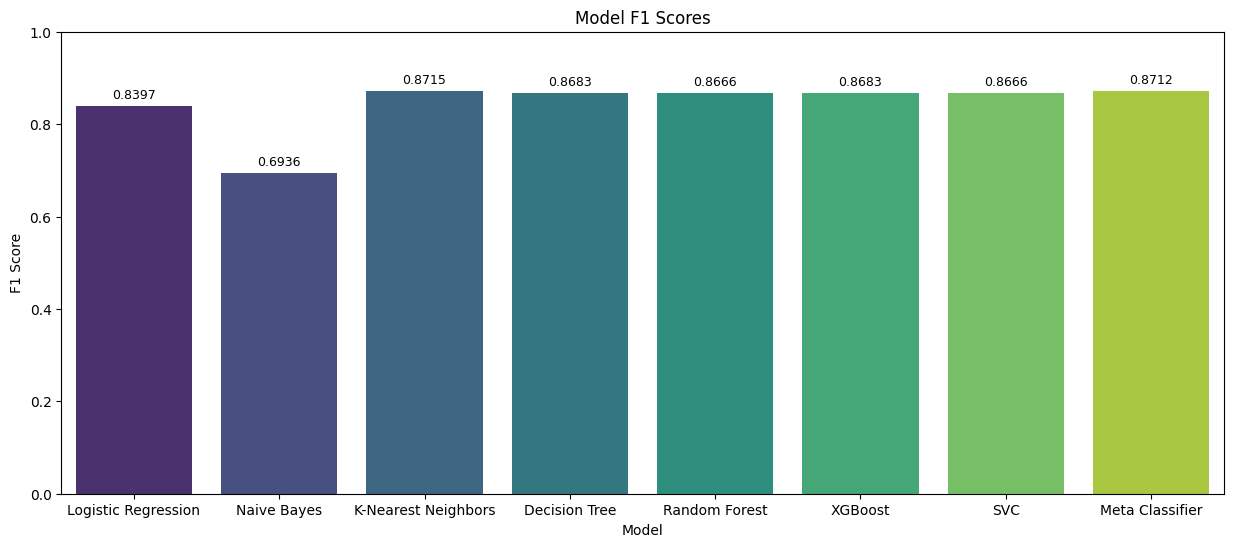

In [ ]:
plt.figure(figsize=(15, 6))
sns.barplot(x=models, y=f1_scores, palette="viridis",legend=False)
plt.title("Model F1 Scores")
plt.xlabel("Model")
plt.ylabel("F1 Score")
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for F1 score

# Display numeric values on the bars for F1 scores
for i, f1 in enumerate(f1_scores):
    plt.text(i, f1 + 0.01, f"{f1:.4f}", ha="center", va="bottom", fontsize=9)

plt.show()

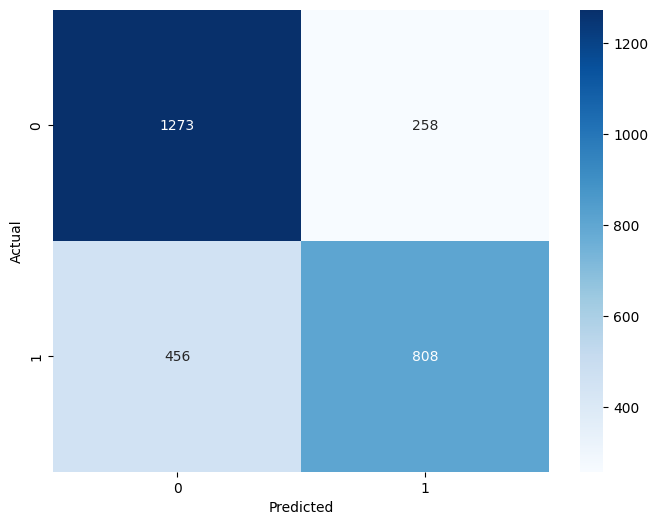

In [ ]:
cm_nb = confusion_matrix(Y_test,X_test_prediction_nbayes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, cmap='Blues', fmt='g')
#plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

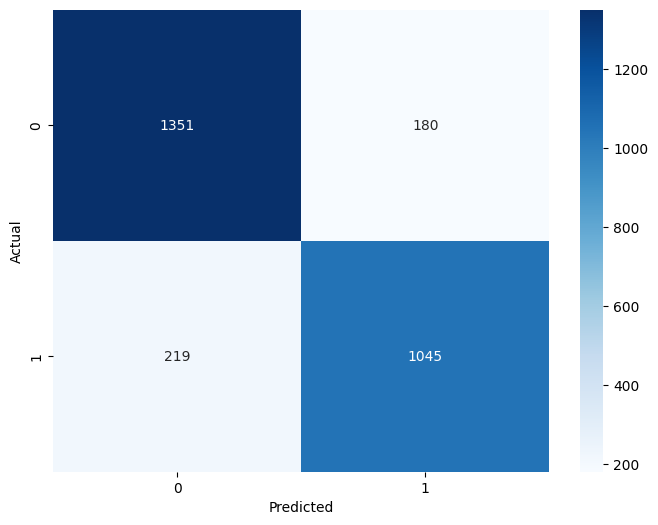

In [ ]:
cm_lr = confusion_matrix(Y_test, X_test_prediction_log_reg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='g')
#plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

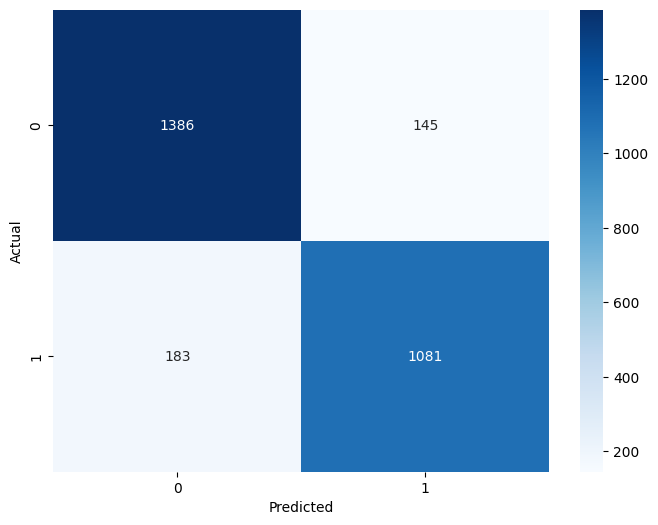

In [ ]:
cm_xgb = confusion_matrix(Y_test, X_test_prediction_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, cmap='Blues', fmt='g')
#plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

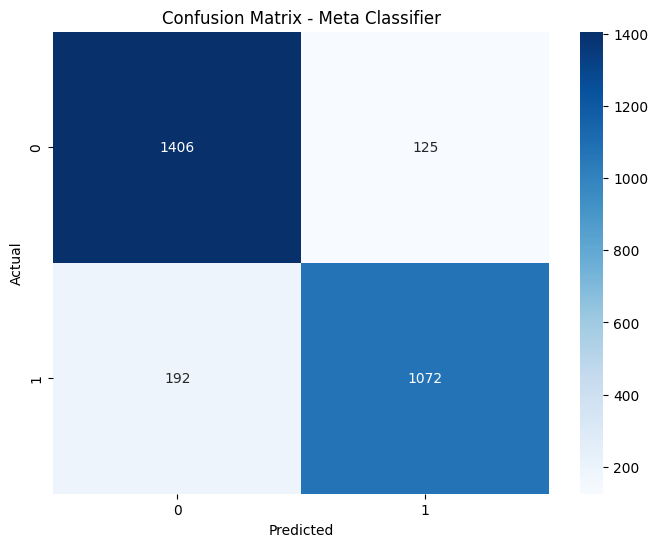

In [ ]:
cm_meta = confusion_matrix(target, y_pred_meta)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_meta, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - Meta Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

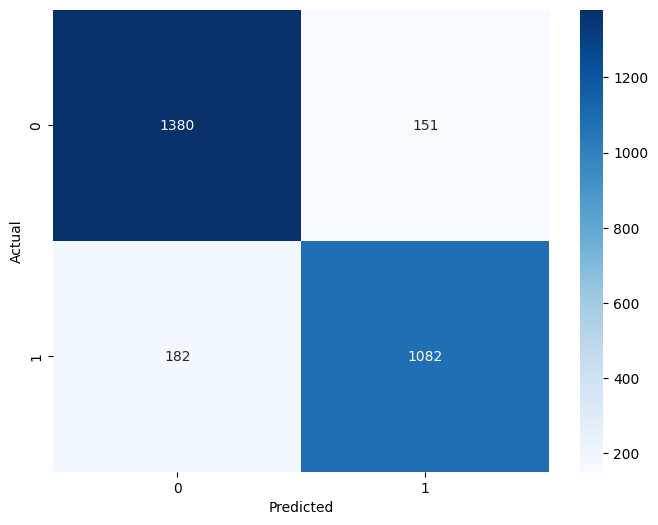

In [ ]:
cm_svc = confusion_matrix(Y_test, X_test_prediction_svc)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svc, annot=True, cmap='Blues', fmt='g')
#plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

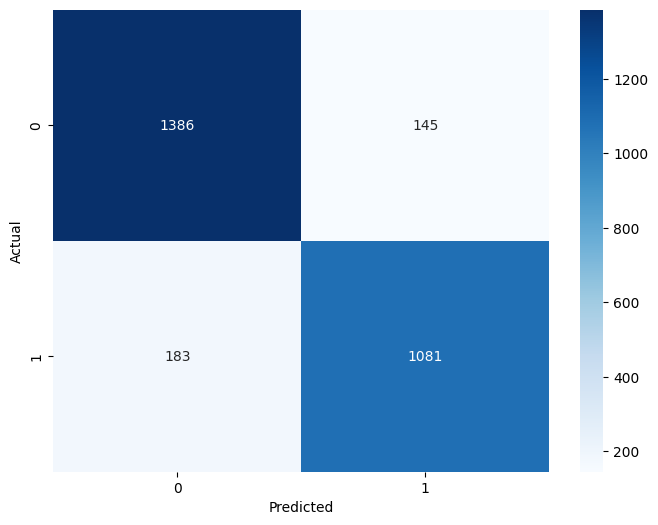

In [ ]:
cm_dt = confusion_matrix(Y_test, X_test_prediction_dt_classifier)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, cmap='Blues', fmt='g')
#plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

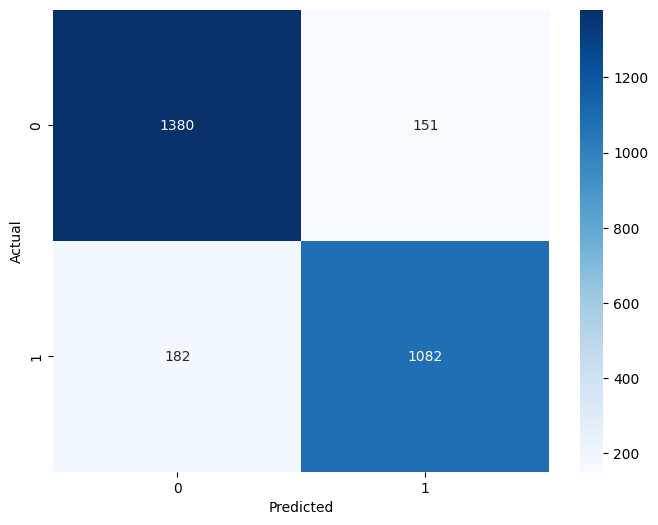

In [ ]:
cm_rf = confusion_matrix(Y_test, X_test_prediction_random_forest)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='g')
#plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

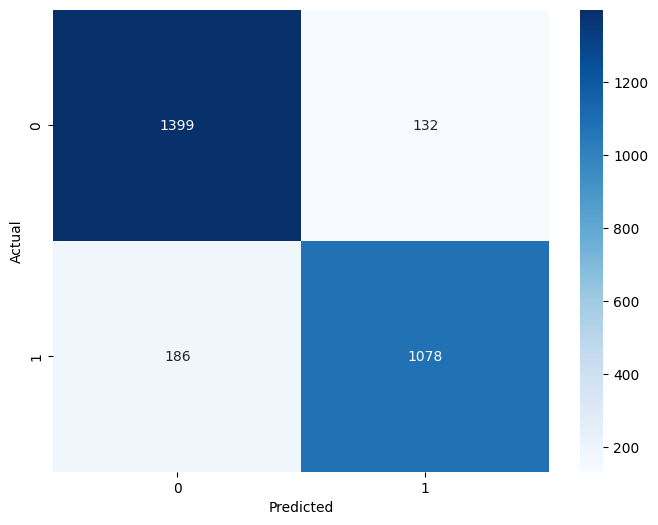

In [ ]:
cm_knn = confusion_matrix(Y_test, X_test_prediction_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, cmap='Blues', fmt='g')
#plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

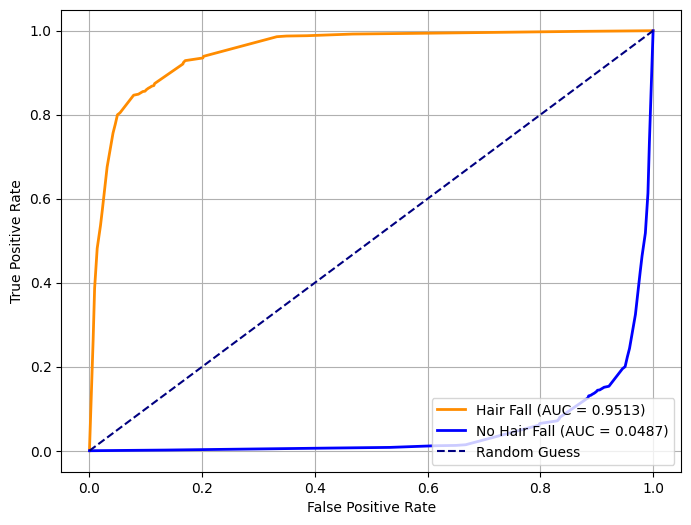

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# 1. Train a classifier (Random Forest)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, Y_train)

# 2. Predict probabilities for both classes
y_pred_proba = model.predict_proba(X_test)

# 3. Calculate AUC scores for both classes
auc_class_1 = roc_auc_score(Y_test, y_pred_proba[:, 1])  # Hair Fall (class 1)
auc_class_0 = roc_auc_score(Y_test, 1 - y_pred_proba[:, 1])  # No Hair Fall (class 0)

# 4. Compute ROC curves for both classes
fpr_1, tpr_1, _ = roc_curve(Y_test, y_pred_proba[:, 1])  # Hair Fall
fpr_0, tpr_0, _ = roc_curve(Y_test, 1 - y_pred_proba[:, 1])  # No Hair Fall

# 5. Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_1, tpr_1, color='darkorange', lw=2, label=f'Hair Fall (AUC = {auc_class_1:.4f})')
plt.plot(fpr_0, tpr_0, color='blue', lw=2, label=f'No Hair Fall (AUC = {auc_class_0:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


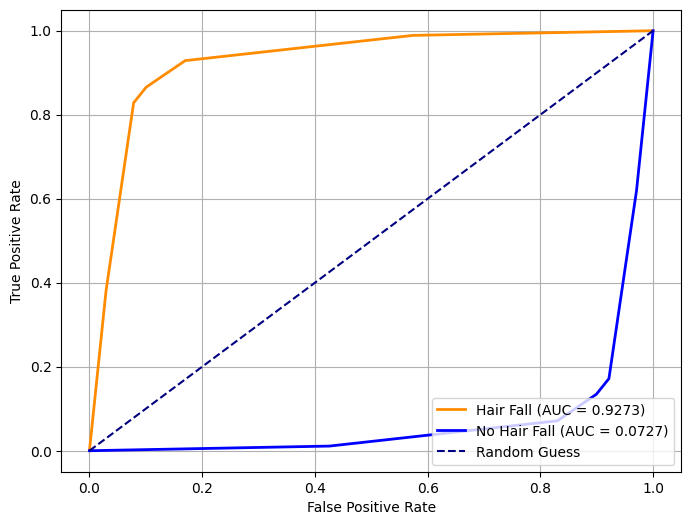

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# 1. Train a classifier (Random Forest)

model = KNeighborsClassifier()
model.fit(X_train, Y_train)

# 2. Predict probabilities for both classes
y_pred_proba = model.predict_proba(X_test)

# 3. Calculate AUC scores for both classes
auc_class_1 = roc_auc_score(Y_test, y_pred_proba[:, 1])  # Hair Fall (class 1)
auc_class_0 = roc_auc_score(Y_test, 1 - y_pred_proba[:, 1])  # No Hair Fall (class 0)

# 4. Compute ROC curves for both classes
fpr_1, tpr_1, _ = roc_curve(Y_test, y_pred_proba[:, 1])  # Hair Fall
fpr_0, tpr_0, _ = roc_curve(Y_test, 1 - y_pred_proba[:, 1])  # No Hair Fall

# 5. Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_1, tpr_1, color='darkorange', lw=2, label=f'Hair Fall (AUC = {auc_class_1:.4f})')
plt.plot(fpr_0, tpr_0, color='blue', lw=2, label=f'No Hair Fall (AUC = {auc_class_0:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


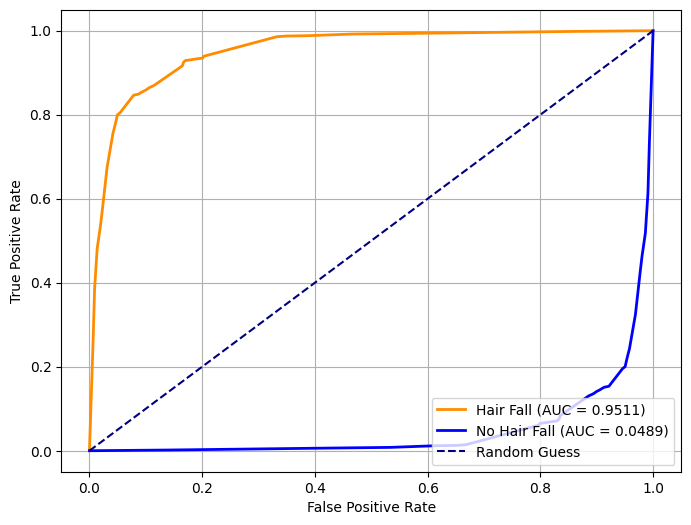

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# 1. Train a classifier (Random Forest)

model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

# 2. Predict probabilities for both classes
y_pred_proba = model.predict_proba(X_test)

# 3. Calculate AUC scores for both classes
auc_class_1 = roc_auc_score(Y_test, y_pred_proba[:, 1])  # Hair Fall (class 1)
auc_class_0 = roc_auc_score(Y_test, 1 - y_pred_proba[:, 1])  # No Hair Fall (class 0)

# 4. Compute ROC curves for both classes
fpr_1, tpr_1, _ = roc_curve(Y_test, y_pred_proba[:, 1])  # Hair Fall
fpr_0, tpr_0, _ = roc_curve(Y_test, 1 - y_pred_proba[:, 1])  # No Hair Fall

# 5. Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_1, tpr_1, color='darkorange', lw=2, label=f'Hair Fall (AUC = {auc_class_1:.4f})')
plt.plot(fpr_0, tpr_0, color='blue', lw=2, label=f'No Hair Fall (AUC = {auc_class_0:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


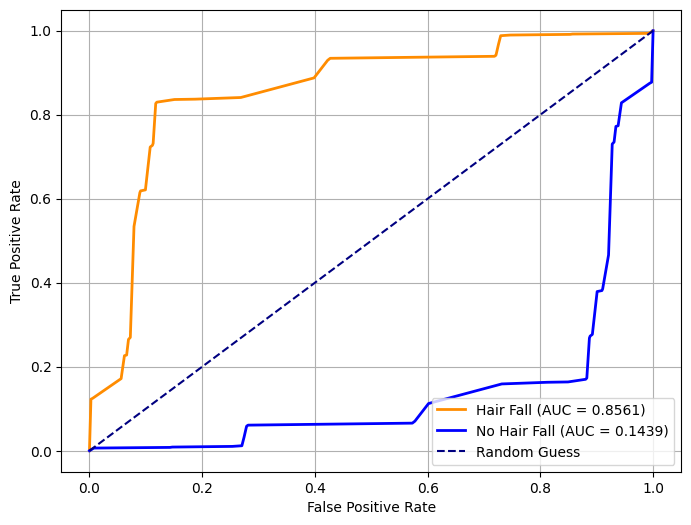

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# 1. Train a classifier (Random Forest)

model =LogisticRegression()
model.fit(X_train, Y_train)

# 2. Predict probabilities for both classes
y_pred_proba = model.predict_proba(X_test)

# 3. Calculate AUC scores for both classes
auc_class_1 = roc_auc_score(Y_test, y_pred_proba[:, 1])  # Hair Fall (class 1)
auc_class_0 = roc_auc_score(Y_test, 1 - y_pred_proba[:, 1])  # No Hair Fall (class 0)

# 4. Compute ROC curves for both classes
fpr_1, tpr_1, _ = roc_curve(Y_test, y_pred_proba[:, 1])  # Hair Fall
fpr_0, tpr_0, _ = roc_curve(Y_test, 1 - y_pred_proba[:, 1])  # No Hair Fall

# 5. Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_1, tpr_1, color='darkorange', lw=2, label=f'Hair Fall (AUC = {auc_class_1:.4f})')
plt.plot(fpr_0, tpr_0, color='blue', lw=2, label=f'No Hair Fall (AUC = {auc_class_0:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


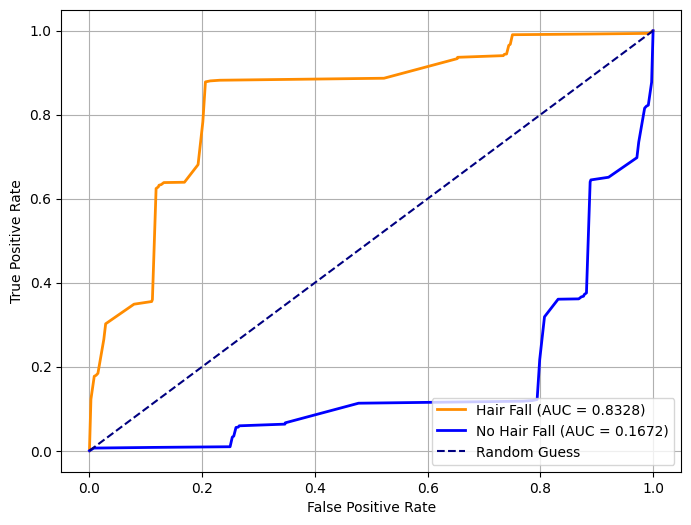

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# 1. Train a classifier (Random Forest)

model =GaussianNB()
model.fit(X_train, Y_train)

# 2. Predict probabilities for both classes
y_pred_proba = model.predict_proba(X_test)

# 3. Calculate AUC scores for both classes
auc_class_1 = roc_auc_score(Y_test, y_pred_proba[:, 1])  # Hair Fall (class 1)
auc_class_0 = roc_auc_score(Y_test, 1 - y_pred_proba[:, 1])  # No Hair Fall (class 0)

# 4. Compute ROC curves for both classes
fpr_1, tpr_1, _ = roc_curve(Y_test, y_pred_proba[:, 1])  # Hair Fall
fpr_0, tpr_0, _ = roc_curve(Y_test, 1 - y_pred_proba[:, 1])  # No Hair Fall

# 5. Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_1, tpr_1, color='darkorange', lw=2, label=f'Hair Fall (AUC = {auc_class_1:.4f})')
plt.plot(fpr_0, tpr_0, color='blue', lw=2, label=f'No Hair Fall (AUC = {auc_class_0:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


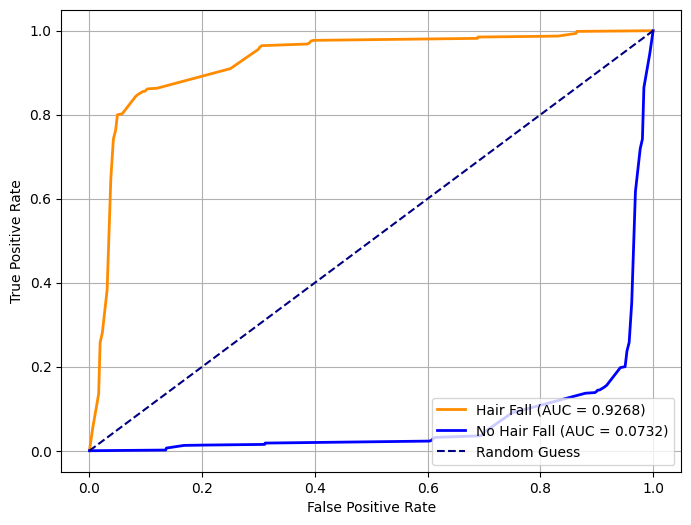

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# 1. Train a classifier (Random Forest)

model = SVC(probability=True)
model.fit(X_train, Y_train)

# 2. Predict probabilities for both classes
y_pred_proba = model.predict_proba(X_test)

# 3. Calculate AUC scores for both classes
auc_class_1 = roc_auc_score(Y_test, y_pred_proba[:, 1])  # Hair Fall (class 1)
auc_class_0 = roc_auc_score(Y_test, 1 - y_pred_proba[:, 1])  # No Hair Fall (class 0)

# 4. Compute ROC curves for both classes
fpr_1, tpr_1, _ = roc_curve(Y_test, y_pred_proba[:, 1])  # Hair Fall
fpr_0, tpr_0, _ = roc_curve(Y_test, 1 - y_pred_proba[:, 1])  # No Hair Fall

# 5. Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_1, tpr_1, color='darkorange', lw=2, label=f'Hair Fall (AUC = {auc_class_1:.4f})')
plt.plot(fpr_0, tpr_0, color='blue', lw=2, label=f'No Hair Fall (AUC = {auc_class_0:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


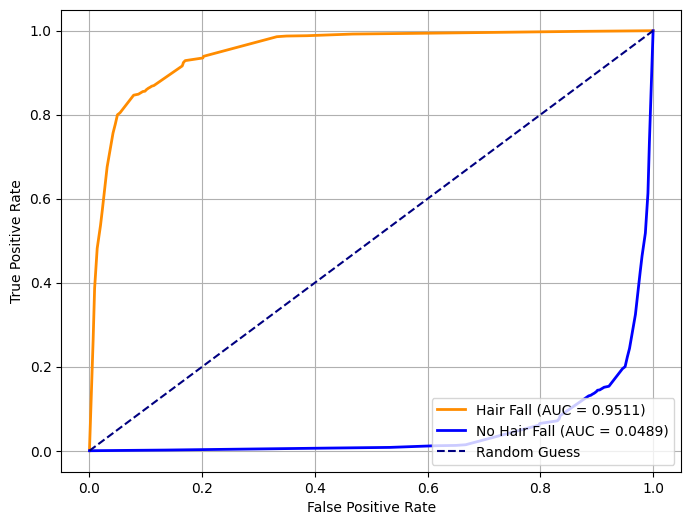

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# 1. Train a classifier (Random Forest)

model =Xgb.XGBClassifier()
model.fit(X_train, Y_train)

# 2. Predict probabilities for both classes
y_pred_proba = model.predict_proba(X_test)

# 3. Calculate AUC scores for both classes
auc_class_1 = roc_auc_score(Y_test, y_pred_proba[:, 1])  # Hair Fall (class 1)
auc_class_0 = roc_auc_score(Y_test, 1 - y_pred_proba[:, 1])  # No Hair Fall (class 0)

# 4. Compute ROC curves for both classes
fpr_1, tpr_1, _ = roc_curve(Y_test, y_pred_proba[:, 1])  # Hair Fall
fpr_0, tpr_0, _ = roc_curve(Y_test, 1 - y_pred_proba[:, 1])  # No Hair Fall

# 5. Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_1, tpr_1, color='darkorange', lw=2, label=f'Hair Fall (AUC = {auc_class_1:.4f})')
plt.plot(fpr_0, tpr_0, color='blue', lw=2, label=f'No Hair Fall (AUC = {auc_class_0:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


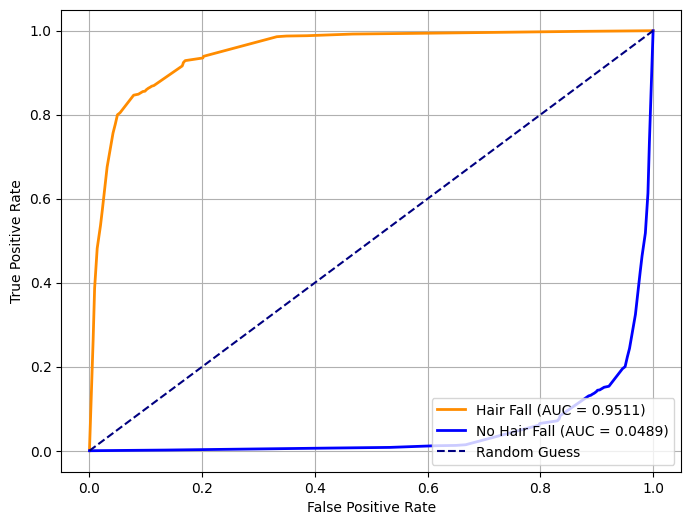

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# 1. Train a classifier (Random Forest)

model =meta_classifier
model.fit(X_train, Y_train)

# 2. Predict probabilities for both classes
y_pred_proba = model.predict_proba(X_test)

# 3. Calculate AUC scores for both classes
auc_class_1 = roc_auc_score(Y_test, y_pred_proba[:, 1])  # Hair Fall (class 1)
auc_class_0 = roc_auc_score(Y_test, 1 - y_pred_proba[:, 1])  # No Hair Fall (class 0)

# 4. Compute ROC curves for both classes
fpr_1, tpr_1, _ = roc_curve(Y_test, y_pred_proba[:, 1])  # Hair Fall
fpr_0, tpr_0, _ = roc_curve(Y_test, 1 - y_pred_proba[:, 1])  # No Hair Fall

# 5. Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_1, tpr_1, color='darkorange', lw=2, label=f'Hair Fall (AUC = {auc_class_1:.4f})')
plt.plot(fpr_0, tpr_0, color='blue', lw=2, label=f'No Hair Fall (AUC = {auc_class_0:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [ ]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout, BatchNormalization
# from tensorflow.keras.optimizers import Adam
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# import matplotlib.pyplot as plt

# # 1. Load Your Real Dataset
# dataset = pd.read_csv('/content/common_dataset.csv')

# # 2. Feature Selection/Engineering
# X = dataset[["Genetics","Medications & Treatments","Weight Loss","Hair_grease","Nutritional Deficiencies","Smoking","Hair_washing"]]
# Y = dataset["Hair Loss"]

# # 3. Train-Test Split
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# # 4. Data Scaling
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# # 5. Reshape Data for Conv1D
# X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
# X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# # 6. Build the CNN Model
# model = Sequential([
#     Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
#     BatchNormalization(),
#     Dropout(0.2),
#     Conv1D(filters=64, kernel_size=3, activation='relu'),
#     BatchNormalization(),
#     Dropout(0.2),
#     Flatten(),
#     Dense(64, activation='relu'),
#     BatchNormalization(),
#     Dropout(0.5),
#     Dense(1, activation='sigmoid')
# ])

# # 7. Compile the Model
# model.compile(optimizer=Adam(learning_rate=0.001),
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# # 8. Train the Model
# history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_test, Y_test), verbose=2)

# # 9. Evaluate the Model
# loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
# print(f"Test Loss: {loss:.4f}")
# print(f"Test Accuracy: {accuracy:.4f}")

# # 10. Predictions and Additional Metrics
# Y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to binary predictions

# precision = precision_score(Y_test, Y_pred)
# recall = recall_score(Y_test, Y_pred)
# f1 = f1_score(Y_test, Y_pred)

# print(f"Precision: {precision:.4f}")
# print(f"Recall: {recall:.4f}")
# print(f"F1-score: {f1:.4f}")

# # 11. Plot Training History (Accuracy and Loss)
# plt.figure(figsize=(12, 5))

# # Plot training & validation accuracy values
# plt.subplot(1, 2, 1)
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='upper left')

# # Plot training & validation loss values
# plt.subplot(1, 2, 2)
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='upper left')

# plt.tight_layout()
# plt.show()

In [ ]:
# import tensorflow as tf
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# import numpy as np

# # Sample Data (replace with your actual data)
# # This is just random data for demonstration
# np.random.seed(42)  # for reproducibility
# X = np.random.rand(100, 5)  # 100 samples, 5 features
# y = np.random.randint(0, 2, 100)  # Binary labels (0 or 1)


# # 1. Data Preprocessing
# # Split into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Scale numerical features (important for neural networks)
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)  # Use the same scaler fitted on the training data


# # 2. Build the Neural Network Model using Keras
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)), # Input layer and hidden layer 1
#     tf.keras.layers.Dropout(0.2),  # Add dropout for regularization
#     tf.keras.layers.Dense(64, activation='relu'),  # Hidden layer 2
#     tf.keras.layers.Dropout(0.2),  # Add dropout for regularization
#     tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer (sigmoid for binary classification)
# ])

# # 3. Compile the Model
# model.compile(optimizer='adam',  # Choose an optimizer
#               loss='binary_crossentropy',  # Binary cross-entropy loss
#               metrics=['accuracy'])  # Metrics to monitor during training

# # 4. Train the Model
# history = model.fit(X_train, y_train, epochs=300, batch_size=64, validation_split=0.1) # validation_split is good practice

# # 5. Evaluate the Model
# loss, accuracy = model.evaluate(X_test, y_test)
# print(f"Test Loss: {loss}")
# print(f"Test Accuracy: {accuracy}")

# # 6. Make Predictions (on new data)
# # new_data = ...  # Your new data (must be preprocessed like training data)
# # new_data_scaled = scaler.transform(new_data) # scaling is very important
# # predictions = model.predict(new_data_scaled)

# # Convert probabilities to class labels (0 or 1)
# # predicted_labels = (predictions > 0.5).astype(int)

# # print(predictions)
# # print(predicted_labels)

# # (Optional) Plot training history
# import matplotlib.pyplot as plt
# plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()

# **1D CNN**

The model in the code is a hybrid model combining an Autoencoder with a 1-Dimensional Convolutional Neural Network (CNN), specifically a CNN Classifier.

Here's a more detailed explanation:

Autoencoder:

The first part of the model is an Autoencoder. This is an unsupervised learning technique primarily used for dimensionality reduction or feature extraction.
It works by learning a compressed representation (encoding) of the input data and then reconstructing the original data from this compressed representation (decoding).
CNN Classifier:

The second part of the model is a CNN, specifically designed for classification.
CNNs are particularly effective in processing data with grid-like topologies, such as images or time series. In this case, the encoded features from the Autoencoder are treated as a 1-dimensional sequence, making a 1D CNN a suitable choice.
The CNN Classifier learns to distinguish between different classes (in your case, likely binary classification for 'Hair Loss') based on the encoded features.
Combining the two:

The Autoencoder acts as a feature extractor, learning relevant features from the original data.
The CNN Classifier then uses these encoded features to make predictions.
Common Names:

You can refer to this model as a Hybrid Autoencoder-CNN Classifier or an Autoencoder-based CNN Classifier.
A more specific name could be Autoencoder-CNN for Hair Loss Classification to reflect the task it's designed for.
Depending on the focus of your research or presentation, you could also emphasize one part of the model. For example, if you want to highlight feature extraction, you might call it an "Autoencoder for Feature Extraction followed by CNN Classification."
I hope this helps to clarify the model's name! Feel free to ask if you have any other questions.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, LeakyReLU, Conv1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('/content/common_dataset.csv')  # Replace with your dataset's file path

# Separate features and target
X = data.drop(columns=['Hair Loss']).values  # Replace 'Hair Loss' with the exact column name for the target
y = data['Hair Loss'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 1: Define and train the Autoencoder
input_dim = X_train.shape[1]
encoding_dim = 8  # Adjust based on desired compression level

# Define the autoencoder architecture
input_layer = Input(shape=(input_dim,))
encoded = Dense(16, activation='relu')(input_layer)
encoded = Dense(encoding_dim, activation='relu')(encoded)  # Compressed representation
decoded = Dense(16, activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# Autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoded)

# Encoder model for feature extraction
encoder = Model(inputs=input_layer, outputs=encoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(X_train, X_train, epochs=100, batch_size=256, validation_split=0.3, verbose=1)

# Step 2: Transform the data using the encoder
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

# Reshape the encoded data for CNN input
X_train_encoded = X_train_encoded.reshape(X_train_encoded.shape[0], X_train_encoded.shape[1], 1)
X_test_encoded = X_test_encoded.reshape(X_test_encoded.shape[0], X_test_encoded.shape[1], 1)

# Step 3: Define the CNN classifier
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, verbose=1)

# Build the CNN model
model = Sequential([
    Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train_encoded.shape[1], 1)),
    BatchNormalization(),
    Dropout(0.3),
    Conv1D(filters=64, kernel_size=2, activation=LeakyReLU(alpha=0.1)),
    BatchNormalization(),
    Dropout(0.3),
    Flatten(),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile the CNN model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the CNN classifier
history = model.fit(
    X_train_encoded, y_train,
    epochs=100,
    batch_size=64,
    validation_data=(X_test_encoded, y_test),
    callbacks=[early_stopping, lr_scheduler, model_checkpoint]
)

# Load the best model for evaluation
model.load_weights('best_model.keras')

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_encoded, y_test, verbose=2)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Plot training and validation accuracy
y_pred = model.predict(X_test_encoded)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 1.2590 - val_loss: 1.2370
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.2303 - val_loss: 1.2010
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 1.1895 - val_loss: 1.1554
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.1438 - val_loss: 1.0971
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 1.0843 - val_loss: 1.0353
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.0142 - val_loss: 0.9865
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.9748 - val_loss: 0.9538
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.9447 - val_loss: 0.9308
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.9213 - val_loss: 0.9107
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.8982 - val_loss: 0.8887
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.8822 - val_loss: 0.8646
Epoch 12/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


 97/102 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5349 - loss: 2.1845
Epoch 1: val_accuracy improved from -inf to 0.78140, saving model to best_model.keras
102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5382 - loss: 2.1732 - val_accuracy: 0.7814 - val_loss: 1.5515 - learning_rate: 1.0000e-04
Epoch 2/100
 94/102 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7020 - loss: 1.6434
Epoch 2: val_accuracy improved from 0.78140 to 0.82326, saving model to best_model.keras
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7044 - loss: 1.6380 - val_accuracy: 0.8233 - val_loss: 1.3610 - learning_rate: 1.0000e-04
Epoch 3/100
100/102 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7793 - loss: 1.4370
Epoch 3: val_accuracy improved from 0.82326 to 0.86369, saving model to best_model.keras
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7794 - loss: 1.4362 - val_accuracy: 0.8637 - val_loss: 1.2364 - learning_rate: 1.0000e-04
Epoch 4/100
 98/102 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/ste

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-39-5b386703dd1f>", line 82, in <cell line: 0>
    history = model.fit(
              ^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 371, in fit
    logs = self.train_function(iterator)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 219, in function
    opt_outputs = multi_step_on_iterator(iterator)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/util/traceback_utils.py", line 150, in erro

TypeError: object of type 'NoneType' has no len()

In [ ]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from tensorflow.keras.models import Model, Sequential
# from tensorflow.keras.layers import Input, Dense, Dropout
# from tensorflow.keras.optimizers import Adam
# import matplotlib.pyplot as plt

# # Load dataset
# data = pd.read_csv('/content/common_dataset.csv')  # Replace with your dataset's path

# # Separate features and target
# X = data.drop(columns=['Hair Loss']).values  # Replace 'Hair Loss' with your target column
# y = data['Hair Loss'].values

# # Convert target to binary if needed
# # y = (y > 0.5).astype(int)  # Uncomment if 'Hair Loss' is not binary

# # Split the dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# # Standardize the dataset
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# # Define the Autoencoder
# input_dim = X_train.shape[1]
# encoding_dim = 32  # Latent space size for encoding

# # Encoder
# input_layer = Input(shape=(input_dim,))
# encoded = Dense(128, activation='relu')(input_layer)
# encoded = Dropout(0.2)(encoded)
# encoded = Dense(encoding_dim, activation='relu')(encoded)

# # Decoder
# decoded = Dense(128, activation='relu')(encoded)
# decoded = Dropout(0.2)(decoded)
# decoded = Dense(input_dim, activation='sigmoid')(decoded)

# # Autoencoder model
# autoencoder = Model(inputs=input_layer, outputs=decoded)

# # Encoder model (for extracting features)
# encoder = Model(inputs=input_layer, outputs=encoded)

# # Compile and train the Autoencoder
# autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
# history = autoencoder.fit(
#     X_train, X_train,
#     epochs=50,
#     batch_size=32,
#     validation_split=0.1,
#     verbose=1
# )

# # Plot Autoencoder loss
# plt.figure(figsize=(10, 6))
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.title('Autoencoder Loss')
# plt.legend()
# plt.show()

# # Transform the data using the encoder
# X_train_encoded = encoder.predict(X_train)
# X_test_encoded = encoder.predict(X_test)

# # Define the Fully Connected Neural Network (FCNN)
# fcnn = Sequential([
#     Dense(64, activation='relu', input_shape=(encoding_dim,)),
#     Dropout(0.3),
#     Dense(32, activation='relu'),
#     Dropout(0.3),
#     Dense(1, activation='sigmoid')  # Binary classification output
# ])

# # Compile the FCNN
# fcnn.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# # Train the FCNN
# history_fcnn = fcnn.fit(
#     X_train_encoded, y_train,
#     epochs=50,
#     batch_size=64,
#     validation_data=(X_test_encoded, y_test),
#     verbose=1
# )

# # Plot FCNN accuracy
# plt.figure(figsize=(10, 6))
# plt.plot(history_fcnn.history['accuracy'], label='Train Accuracy')
# plt.plot(history_fcnn.history['val_accuracy'], label='Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.title('FCNN Accuracy')
# plt.legend()
# plt.show()

# # Plot FCNN loss
# plt.figure(figsize=(10, 6))
# plt.plot(history_fcnn.history['loss'], label='Train Loss')
# plt.plot(history_fcnn.history['val_loss'], label='Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.title('FCNN Loss')
# plt.legend()
# plt.show()

# # Evaluate the model on the test set
# loss, accuracy = fcnn.evaluate(X_test_encoded, y_test, verbose=2)
# print(f"Test Loss: {loss:.4f}")
# print(f"Test Accuracy: {accuracy:.4f}")